# AIRLINE - CUSTOMER SATISFACTION

<span style="color:gray">**INFORMACIÓN**</span>

- Archivo extraído de https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction
- Idea disparadora: crear un modelo que prediga la compra de un pasajero de ómnibus según su comportamiento en el pasado o el comporamiento de usuarios con características similares. Dado que no conseguí un dataset de este estilo, extraje uno de una aerolínea y puedo replicarlo en caso de conseguir la información requerida

![Customer satisfaction](Daco_4436699.png)

<span style="color:gray">**CONSIGNA**</span>

Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.

<span style="color:gray">**ÍNDICE**</span>

1) Abstract
2) Antes de empezar 
3) Resumen de las entregas anteriores
4) Preguntas e hipótesis
5) Visualizaciones

### 1. Abstract
El análisis de satisfacción de clientes en la aerolínea revela una percepción general positiva, con un 55% de usuarios satisfechos y un 45% insatisfechos. Sin embargo, se encuentra 15 puntos porcentuales por debajo de la meta del 70% (assumption), indicando áreas de mejora. Se destaca que las mujeres tienden a estar más satisfechas que los hombres.

La lealtad del cliente está estrechamente relacionada con la satisfacción. Aunque el 80% de los clientes son leales, su satisfacción está 8 puntos porcentuales por debajo de la meta. Esto sugiere la necesidad de enfocarse en mejorar la experiencia estos clientes.

La edad media de satisfacción ronda los 40 años, pero la dispersión es alta. Se observa una concentración alrededor de los 40 años, especialmente en mujeres satisfechas. Las edades influyen más en la satisfacción de las mujeres que en los hombres.

En cuanto al tipo de viaje, los viajes de negocios predominan, pero ambos tipos (negocios y personal) tienen niveles de satisfacción por debajo del objetivo. La clase de vuelo también impacta; la satisfacción es más baja en económica y más alta en negocios.

La distancia del vuelo afecta la satisfacción, siendo los vuelos más largos los menos satisfactorios. Se plantea la necesidad de analizar la relación entre la clase de vuelo y la distancia para comprender mejor este impacto.

A priori los servicios en línea y del aeropuerto tienen una fuerte correlación con la satisfacción, mientras que los servicios a bordo no muestran una relación clara. Los servicios online pesan más en la satisfacción overall.

El análisis de la duración de los retrasos indica una dispersión elevada en ambos estados de satisfacción. Se propone realizar clusters para comprender mejor cómo la duración de los retrasos impacta en la satisfacción.

Finalmente, se identifican los servicios que más influyen en la satisfacción: el entretenimiento a bordo, la comodidad del asiento y la facilidad de reserva en línea. La puntualidad en la salida y llegada también afecta significativamente la satisfacción.

Este análisis proporciona una visión detallada de los factores que afectan la satisfacción del cliente en la aerolínea, destacando áreas clave para mejorar y alcanzar los objetivos de satisfacción.

### 2. Antes de empezar

In [578]:
import pandas as pd
import numpy as np
from colorama import Fore, Style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from tabulate import tabulate
import warnings
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew

# Desactivar advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

colores = ['#0033a0', '#eb0029'] #azul y rojo
colores_satif = ['#eb0029', '#8DB600'] #rojo y verde manzana

def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

### 3. Resumen de las entregas anteriores

In [199]:
# Importo el dataset
print(Style.BRIGHT+Fore.LIGHTMAGENTA_EX+'¿Qué información tiene el dataset?'+Style.RESET_ALL)
import pandas as pd
df_airline = pd.read_csv("C:\\Users\\Flori\\CODERHOUSE\\airlinesatisfaction.csv")  
df = df_airline.sort_values(by='satisfaction', ascending=False)
print(df.info())

print()

# Información de cada campo object
print(Style.BRIGHT+Fore.LIGHTMAGENTA_EX+'Datos en cada campo object'+Style.RESET_ALL)
satisf = df['satisfaction'].unique()
cust_type = df['Customer Type'].unique()
type_travel = df['Type of Travel'].unique()
cust_class = df['Class'].unique()
print(satisf)
print(cust_type)
print(type_travel)
print(cust_class)

# Reemplazo los datos faltantes por cero por la naturaleza de los datos

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

df['satisfaction'] = df['satisfaction'].str.title()
df['Customer Type'] = df['Customer Type'].str.title()
df['Type of Travel'] = df['Type of Travel'].str.title()
df['Class'] = df['Class'].str.title()


¿Qué información tiene el dataset?
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight 

In [5]:
print(df.describe())

                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000     

### 4. Preguntas e hipótesis

***Preguntas***

1. ¿Cuál es el nivel de satisfacción de la aerolínea?
2. ¿Existe una diferencia en la satisfacción entre los sexos?
3. ¿Los clientes "Loyal" tienden a estar más satisfechos que los clientes ocasionales?
4. ¿Cómo influye la edad en la satisfacción?
5. ¿El tipo de viaje (negocios o placer) afecta la satisfacción de manera significativa?
6. ¿Qué clase de vuelo (económica, negocios, primera clase) tiene la mayor satisfacción?
7. ¿La distancia del vuelo tiene un impacto en la satisfacción de los pasajeros?
8. ¿Cómo se correlacionan los diferentes servicios a bordo, como la comodidad del asiento, la comida y bebida, el entretenimiento y el wifi con la satisfacción?
9. ¿La puntualidad en la salida y llegada del vuelo afecta la satisfacción de los pasajeros?
10. ¿La calidad de los servicios en línea, como la facilidad de reserva y el soporte en línea tiene relación con la satisfacción?
11. ¿Cuáles son los servicios que más pesan en la satisfacción?
12. ¿Cuál es la distribución de la duración de los retrasos en la salida y cómo afecta esto a la satisfacción?



***Hipótesis***

1. Hipótesis nula (H0): No hay diferencia significativa en la satisfacción entre hombres y mujeres.
   Hipótesis alternativa (H1): Existe una diferencia significativa en la satisfacción entre hombres y mujeres.

2. Hipótesis nula (H0): No hay diferencia significativa en la satisfacción entre clientes "Loyal" y ocasionales.
   Hipótesis alternativa (H1): Los clientes habituales están más satisfechos que los ocasionales.

3. Hipótesis nula (H0): No hay una relación significativa entre la edad y la satisfacción.
   Hipótesis alternativa (H1): La satisfacción varía con la edad de los viajeros.

4. Hipótesis nula (H0): El tipo de viaje no afecta significativamente la satisfacción.
   Hipótesis alternativa (H1): El tipo de viaje influye en la satisfacción de manera significativa.

5. Hipótesis nula (H0): No hay diferencia significativa en la satisfacción entre clases de vuelo.
   Hipótesis alternativa (H1): La clase de vuelo tiene un impacto en la satisfacción.

6. Hipótesis nula (H0): La distancia del vuelo no influye la satisfacción.
   Hipótesis alternativa (H1): La distancia del vuelo influye en la satisfacción de los pasajeros.

7. Hipótesis nula (H0): No hay relación significativa entre los servicios a bordo y la satisfacción.
   Hipótesis alternativa (H1): La calidad de los servicios a bordo influye en la satisfacción.

8. Hipótesis nula (H0): La puntualidad no está relacionada con la satisfacción de los pasajeros.
   Hipótesis alternativa (H1): La puntualidad afecta la satisfacción de los viajeros.

9. Hipótesis nula (H0): La calidad de los servicios en línea no impacta en la satisfacción.
   Hipótesis alternativa (H1): La calidad de los servicios en línea influye en la satisfacción.
   

### 5. Visualizaciones

###### 5.1. ¿Cuál es el nivel de satisfacción de la aerolínea? Distribuir por Sexo
El servicio overall es bueno dado que hay más usuarios satisfechos (55%) que insatisfechos (45%). Tomando el assumption de que la aerolínea quiere conseguir un mínimo de 70% de usuarios satisfechos, hay mucho por hacer, estando 15 p.p. por debajo del objetivo.
Por otro lado, las mujeres suelen estar más satisfechas que los hombres.

Satisfacción
satisfaction
Satisfied       54.7%
Dissatisfied    45.3%
Name: count, dtype: object

Porcentaje de satisfechos por Sexo
Gender
Female    65.1%
Male      44.0%
Name: satisf_binaria, dtype: object

Hay una diferencia de 21 p.p. entre sexos



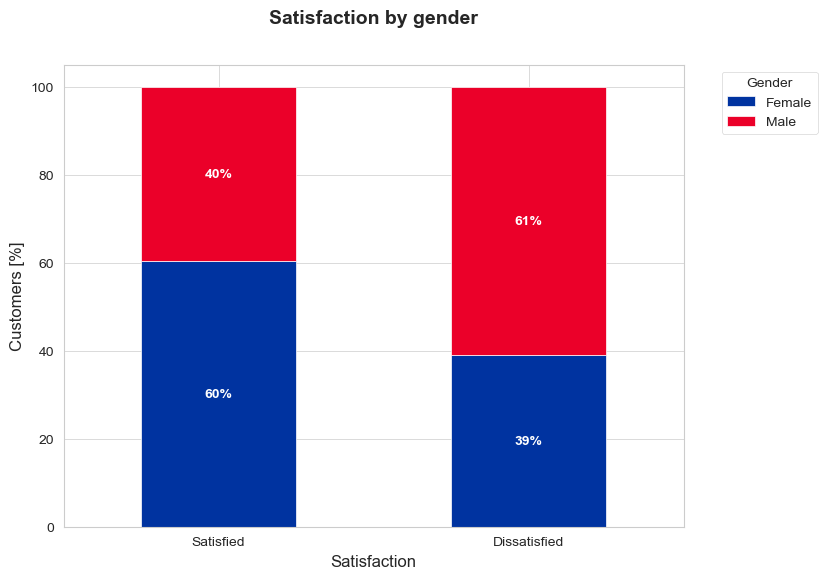

In [200]:
#Me traigo la satisfaccion
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Satisfacción'+Style.RESET_ALL)
satisf = df['satisfaction'].value_counts() / df['satisfaction'].count() * 100
print(satisf.map('{:.1f}%'.format))
print()

#Creo una columna satisfaccion binaria que indica 1 si la respuesta es satisfied y 0 en caso contrario para poder manipular mas facil los datos
satisf_binaria = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df['satisf_binaria'] = satisf_binaria

#Analizo la satisfaccion por sexo
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Sexo'+Style.RESET_ALL)
gender_satisfechos = df[['Gender','satisfaction','satisf_binaria']].groupby('Gender')['satisf_binaria'].mean() * 100 
print(gender_satisfechos.map('{:.1f}%'.format))
print()

gender_dif = np.diff(gender_satisfechos)[0]
print('Hay una diferencia de',abs(gender_dif.astype(int)),'p.p. entre sexos')
print()

#Creo las variables que necesito para graficar
gender_nom = df.groupby(['satisfaction', 'Gender']).size().unstack(fill_value=0)
gender_pct = gender_nom.div(gender_nom.sum(axis=1), axis=0) * 100
gender_pct_sort = gender_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = gender_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores)

plt.title("Satisfaction by gender",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
ax = plt.gca()
ax.set_xticklabels(["Satisfied", "Dissatisfied"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


###### 5.2. ¿Los clientes "Loyal" tienden a estar más satisfechos que los clientes ocasionales?
Un usuario satisfecho puede volverse leal y un usuario leal debe estar satisfecho para volverse en recurrente. Los usuarios Loyal son el 80% de la encuesta, por esto es que deberían ser el foco de atención del análisis. Observando los resultados, los usuarios Loyal son más propensos a encontrarse satisfechos, sin embargo, los niveles de satisfacción se encuentran 8 p.p. por debajo del objetivo establecido de 70%, habiendo espacios de mejora. 


Tipo de cliente
| Tipo de Cliente   |   Frecuencia | Porcentaje   |
|-------------------+--------------+--------------|
| Loyal Customer    |       106100 | 81.7%        |
| Disloyal Customer |        23780 | 18.3%        |

Porcentaje de satisfechos por Tipo de cliente
Customer Type
Disloyal Customer    24.0%
Loyal Customer       61.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 37 p.p. entre tipo de clientes



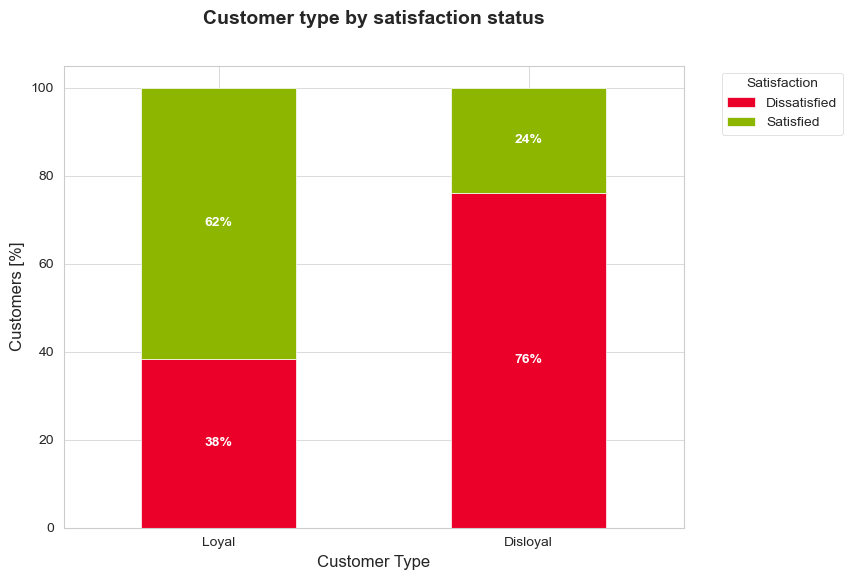

In [201]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de clientes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de cliente'+Style.RESET_ALL)
tipo_cliente_nom = df['Customer Type'].value_counts()
tipo_cliente_pct = (df['Customer Type'].value_counts() / df['Customer Type'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_cliente = pd.DataFrame({
    'Tipo de Cliente': tipo_cliente_nom.index,
    'Frecuencia': tipo_cliente_nom.values,
    'Porcentaje': tipo_cliente_pct.values
})

tabla_formateada_tipo_cliente = tabulate(tabla_tipo_cliente, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_cliente)
print()

#Analizo la satisfaccion por tipo de cliente
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de cliente'+Style.RESET_ALL)
customer_satisfechos = df[['Customer Type','satisfaction','satisf_binaria']].groupby('Customer Type')['satisf_binaria'].mean() * 100 
print(customer_satisfechos.map('{:.1f}%'.format))
print()

customer_dif = np.diff(customer_satisfechos)[0]
print('Hay una diferencia de',abs(customer_dif.astype(int)),'p.p. entre tipo de clientes')
print()

#Creo variables para graficar
customer_nom = df.groupby(['Customer Type', 'satisfaction']).size().unstack(fill_value=0)
customer_pct = customer_nom.div(customer_nom.sum(axis=1), axis=0) * 100
customer_pct_sort = customer_pct.sort_values(by='Customer Type', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = customer_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Customer type by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Customer Type')
ax = plt.gca()
ax.set_xticklabels(["Loyal", "Disloyal"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


###### 5.3. ¿Cómo influye la edad en la satisfacción? ¿Cómo se relaciona con el sexo?
Las edad media en cada una de los estados de satisfacción ronda los 40 años, dato que coincide con la edad media y la moda de toda la base. Por ende, este dato no estaría impactando gravemente en el criterio. Los valores se encuentran dispersos dado que el coeficiente de variación es superior al 20% en ambos estados de satisfacción, sin embargo, el coeficiente de asimetría de los datos para ambos estados se acerca al 0, por lo que hay una concentración de usuarios cercanos a los 40 años.

Observando la distribución por sexo y satisfacción, la mayor cantidad de mujeres satisfechas se encuentran entre los 40 y 60 años, mientras que la mayoría de las insatisfechas están entre los 20 y los 40 años. Para el caso de los hombres se ve un comportamiento similar, sin embargo, los usuarios insatisfechos se encuentran más dispersos, encontrándose una gran parte por encima de los 40 años.

Edades
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |   CV [%] |
|----------------+-------+----------+-------+--------+--------+-----------+----------|
| Dissatisfied   |     7 |       36 |    85 |     37 |     25 |        15 |  40.5405 |
| Satisfied      |     7 |       42 |    85 |     41 |     39 |        14 |  34.1463 |

Coeficiente de asimetría para ambos estados de satisfacción
El coeficiente de asimetría para los usuarios satisfechos es de -0.24
El coeficiente de asimetría para los usuarios insatisfechos es de 0.27



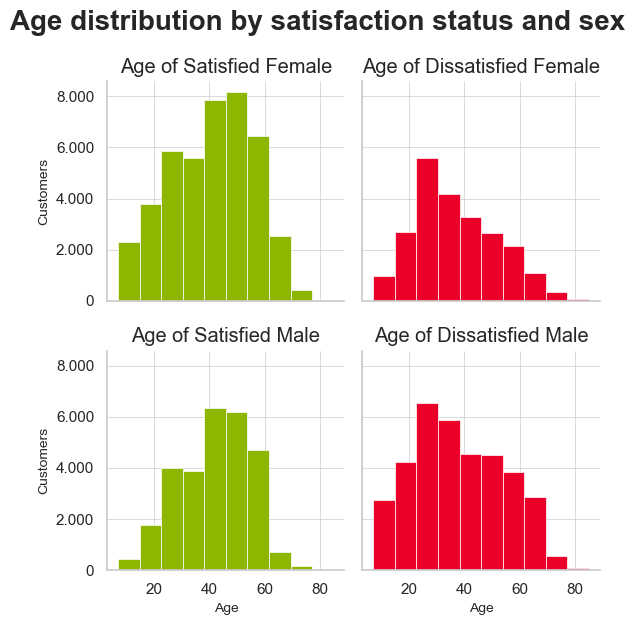

In [604]:
#Me traigo la edad media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Edades'+Style.RESET_ALL)
age_satisf_mean = df[['satisfaction','Age']].groupby('satisfaction')['Age'].mean().astype(int)
age_satisf_max = df[['satisfaction','Age']].groupby('satisfaction')['Age'].max().astype(int)
age_satisf_min = df[['satisfaction','Age']].groupby('satisfaction')['Age'].min().astype(int)
age_satisf_median = df[['satisfaction','Age']].groupby('satisfaction')['Age'].median().astype(int)
age_satisf_desv = df[['satisfaction','Age']].groupby('satisfaction')['Age'].std().astype(int)
age_satisf_mode = df[['satisfaction','Age']].groupby('satisfaction')['Age'].apply(lambda x: x.mode().astype(int))
age_satisf_cv = age_satisf_desv/age_satisf_mean * 100

tabla_age = pd.DataFrame({
    'Satisfacción': age_satisf_mean.index,
    'Min': age_satisf_min.values,
    'Median': age_satisf_median.values,
    'Max': age_satisf_max.values,
    'Mean': age_satisf_mean.values,
    'Mode': age_satisf_mode.values,
    'DesvStd': age_satisf_desv.values,
    'CV [%]': age_satisf_cv.values,
})

tabla_formateada_age = tabulate(tabla_age, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_age)
print()

print(Style.BRIGHT+Fore.LIGHTRED_EX+'Coeficiente de asimetría para ambos estados de satisfacción'+Style.RESET_ALL)
coeficiente_asimetria = skew(df[df['satisfaction'] == 'Satisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios satisfechos es de',round(coeficiente_asimetria,2))
coeficiente_asimetria_1 = skew(df[df['satisfaction'] == 'Dissatisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios insatisfechos es de',round(coeficiente_asimetria_1,2))
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  row = "Gender",
                  palette = paleta_colores
                  )
ax.map(sns.histplot, "Age", bins = 10)

ax.set_titles(template="Age of {col_name} {row_name}", fontsize = 6)

ax.set_axis_labels("Age", "Customers", fontsize = 10)

plt.suptitle("Age distribution by satisfaction status and sex", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
ax = plt.gca()

###### 5.4. ¿El tipo de viaje (negocios o placer) afecta a la satisfacción de manera significativa?
Los viajes de negocio son los más utilizados (69%). Ambos servicios se encuentran por debajo del nivel de satisfacción deseado del 70%, sin embargo, el más afectado es el servicio de viaje Personal. A su vez, si observamos cómo se componen los tipos de viaje por clase de viaje se puede ver que la mayoría de los viajes de negocio se realizan en Business Class, eso justifica en mayor medida por qué la satisfacción de este grupo es superior. 

Tipo de viaje
| Tipo de viaje   |   Frecuencia | Porcentaje   |
|-----------------+--------------+--------------|
| Business Travel |        89693 | 69.1%        |
| Personal Travel |        40187 | 30.9%        |

Porcentaje de satisfechos por Tipo de Viaje
Type of Travel
Business Travel    58.4%
Personal Travel    46.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 11 p.p. entre tipos de viaje



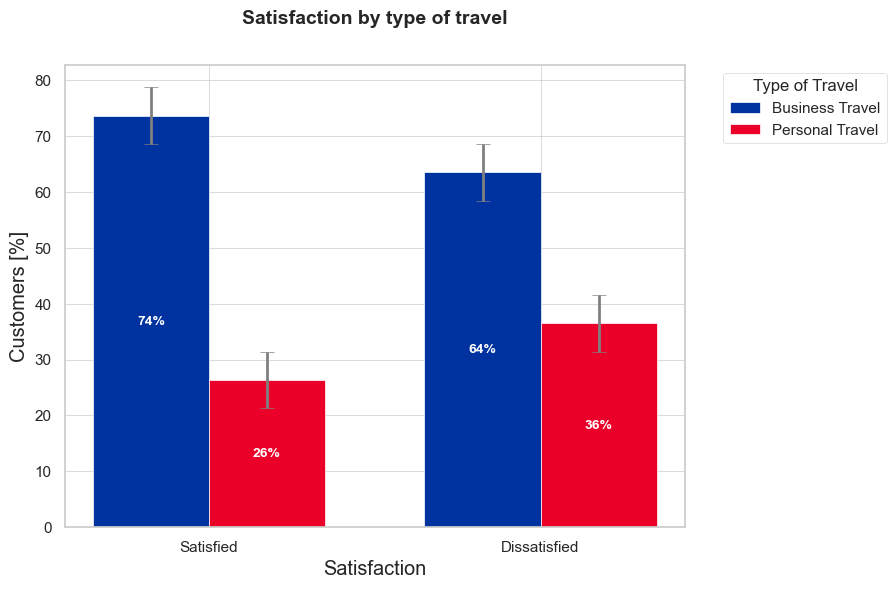

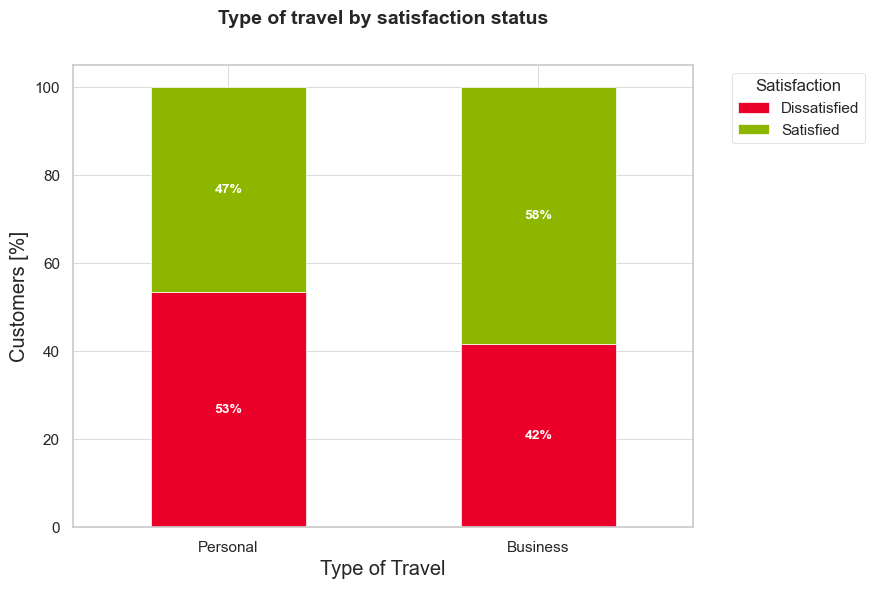

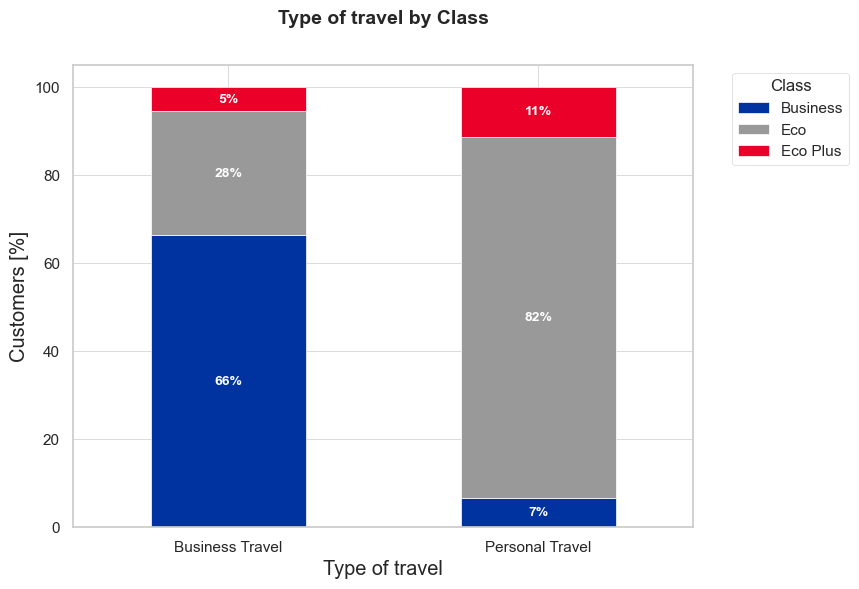

In [610]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de viajes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de viaje'+Style.RESET_ALL)
tipo_viaje_nom = df['Type of Travel'].value_counts()
tipo_viaje_pct = (df['Type of Travel'].value_counts() / df['Type of Travel'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_viaje = pd.DataFrame({
    'Tipo de viaje': tipo_viaje_nom.index,
    'Frecuencia': tipo_viaje_nom.values,
    'Porcentaje': tipo_viaje_pct.values
})

tabla_formateada_tipo_viaje = tabulate(tabla_tipo_viaje, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_viaje)
print()

#Analizo la satisfaccion por tipo de viaje
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de Viaje'+Style.RESET_ALL)
travel_satisfechos = df[['Type of Travel','satisfaction','satisf_binaria']].groupby('Type of Travel')['satisf_binaria'].mean() * 100 
print(travel_satisfechos.map('{:.1f}%'.format))
print()

travel_dif = np.diff(travel_satisfechos)[0]
print('Hay una diferencia de',abs(travel_dif.astype(int)),'p.p. entre tipos de viaje')
print()

#Creo las variables que necesito para graficar
travel_nom = df.groupby(['satisfaction', 'Type of Travel']).size().unstack(fill_value=0)
travel_pct = travel_nom.div(travel_nom.sum(axis=1), axis=0) * 100
travel_pct_sort = travel_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
bar_positions = np.arange(len(travel_pct_sort.index))

bars_satisfied = plt.bar(bar_positions, travel_pct_sort['Business Travel'], width=bar_width, label='Business Travel', color='#0033a0')
bars_dissatisfied = plt.bar(bar_positions + bar_width, travel_pct_sort['Personal Travel'], width=bar_width, label='Personal Travel', color= '#eb0029')

# Agrego barras de error
errors_satisfied = plt.errorbar(
    bar_positions,
    travel_pct_sort['Business Travel'],
    yerr=np.std(travel_pct_sort['Business Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

errors_dissatisfied = plt.errorbar(
    bar_positions + bar_width,
    travel_pct_sort['Personal Travel'],
    yerr=np.std(travel_pct_sort['Personal Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

plt.title("Satisfaction by type of travel", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Type of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
travel1_nom = df.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)
travel1_pct = travel1_nom.div(travel1_nom.sum(axis=1), axis=0) * 100
travel1_pct_sort = travel1_pct.sort_values(by='Type of Travel', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = travel1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Type of travel by satisfaction status", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of Travel')
ax = plt.gca()
ax.set_xticklabels(["Personal", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

# Agrupo los datos por Class y Type of Travel y cuento la cantidad de usuarios
agrupado = df.groupby(['Type of Travel','Class']).size().unstack(fill_value=0)
agrupado_pct = agrupado.div(agrupado.sum(axis=1), axis=0) * 100
custom_colors = ['#0033a0', '#999999','#eb0029']

ax = agrupado_pct.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.title("Type of travel by Class", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of travel')
plt.ylabel('Customers [%]')
plt.legend(title='Class',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


###### 5.5. ¿Qué clase de vuelo (económica, negocios, primera clase) tiene la mayor satisfacción?
La satisfacción más baja la tienen los usuarios que viajan en económica (Eco), con menos de 40% de satisfacción e implican casi el 50% del total de los clientes de la aerolínea. Los usuarios con mayor nivel de satisfacción son los que viajan en Business (primera clase). Esto hace sentido ya que los asientos son más cómodos y el servicio es premium. 
Dado que la satisfacción de los usuarios de Business supera el target de la aerolínea, los esfuerzos en mejorar la satisfacción de los clientes puede ser redirigida a las otras dos clases ya que se encuentran con satisfacciones menores al target por 30 p.p. aproximadamente.

Clase de vuelo
| Clase    |   Frecuencia | Porcentaje   |
|----------+--------------+--------------|
| Business |        62160 | 47.9%        |
| Eco      |        58309 | 44.9%        |
| Eco Plus |         9411 | 7.2%         |

Porcentaje de satisfechos por Clase
Class
Business    70.9%
Eco         39.4%
Eco Plus    42.7%
Name: satisf_binaria, dtype: object

Hay una diferencia de 31 p.p. entre clases



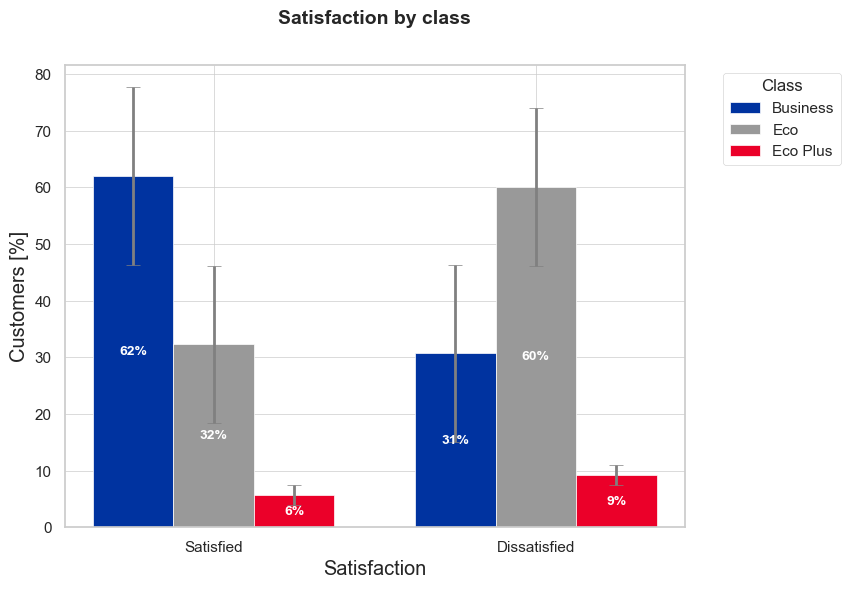

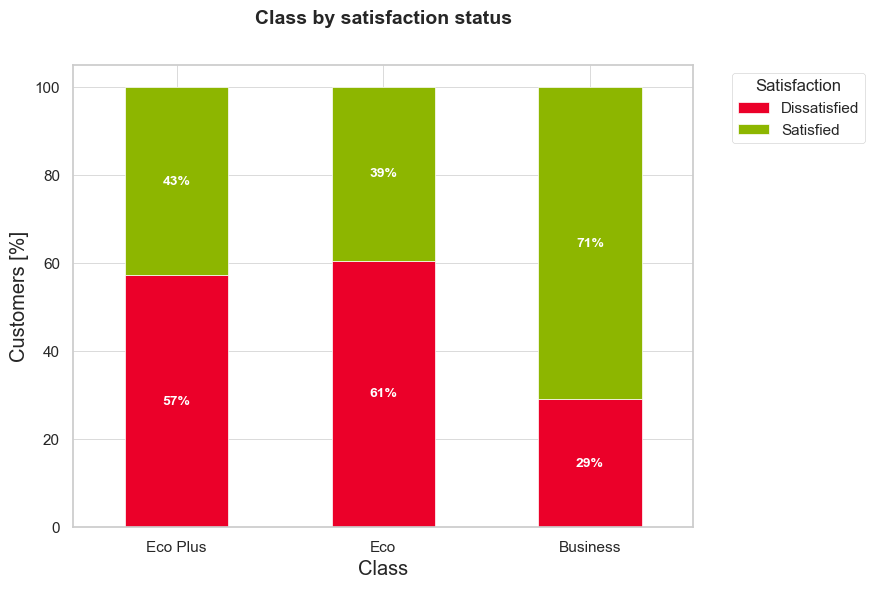

In [611]:
#Me traigo la cantidad de pasajeros en cada uno de las clases de vuelos
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Clase de vuelo'+Style.RESET_ALL)
clase_nom = df['Class'].value_counts()
clase_pct = (df['Class'].value_counts() / df['Class'].count() * 100).map('{:.1f}%'.format)

tabla_clase = pd.DataFrame({
    'Clase': clase_nom.index,
    'Frecuencia': clase_nom.values,
    'Porcentaje': clase_pct.values
})

tabla_formateada_clase = tabulate(tabla_clase, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_clase)
print()

#Analizo la satisfaccion por clase
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Clase'+Style.RESET_ALL)
class_satisfechos = df[['Class','satisfaction','satisf_binaria']].groupby('Class')['satisf_binaria'].mean() * 100 
print(class_satisfechos.map('{:.1f}%'.format))
print()

class_dif = np.diff(class_satisfechos)[0]
print('Hay una diferencia de',abs(class_dif.astype(int)),'p.p. entre clases')
print()

#Creo las variables que necesito para graficar
class_nom = df.groupby(['satisfaction', 'Class']).size().unstack(fill_value=0)
class_pct = class_nom.div(class_nom.sum(axis=1), axis=0) * 100
class_pct_sort = class_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.25
bar_positions = np.arange(len(class_pct_sort.index))
classes = class_pct_sort.columns
custom_colors = ['#0033a0', '#999999','#eb0029']

for i, class_type in enumerate(classes):
    bars = plt.bar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        width=bar_width,
        label=class_type,
        color=custom_colors[i],
    )
    
# Agrego barras de error
    plt.errorbar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        yerr=np.std(class_pct_sort[class_type]),
        fmt='none',
        color='gray',
        capsize=5,
        capthick=0.5
    )

plt.title("Satisfaction by class", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width * (len(classes) - 1) / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
class1_nom = df.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
class1_pct = class1_nom.div(class1_nom.sum(axis=1), axis=0) * 100
class1_pct_sort = class1_pct.sort_values(by='Class', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = class1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Class by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Class')
ax = plt.gca()
ax.set_xticklabels(["Eco Plus", "Eco", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


###### 5.6. ¿La distancia del vuelo tiene un impacto en la satisfacción de los pasajeros?
Los vuelos más largos son los que tienen altos niveles de usuarios insatisfechos. Sin embargo, una pregunta para hacerse es: de los usuarios satisfechos que viajan distancias largas, cuántos viajes corresponden a usuarios que viajan en Business. Lo mismo ocurre con los insatisfechos: de los usuarios que recorren pocos kilómetros y se encuentran insatisfechos, cuántos corresponden a viajes en Business y cuántos a viajes en Eco. Para esto en los próximos análisis me encargaré de clusterizar las distancias para entender cómo se relacionan estas dos variables (Clase y Distancias).

Distancias [km]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |    50 |     1955 |  6951 |   2025 |   1963 |       888 |
| Satisfied      |    50 |     1886 |  6950 |   1944 |   1625 |      1127 |

Hay una diferencia de 81 km entre los estados de satisfacción



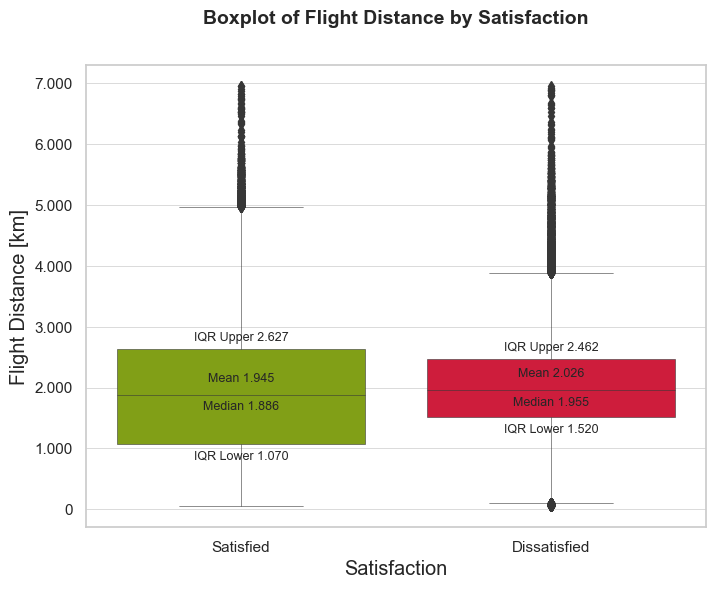

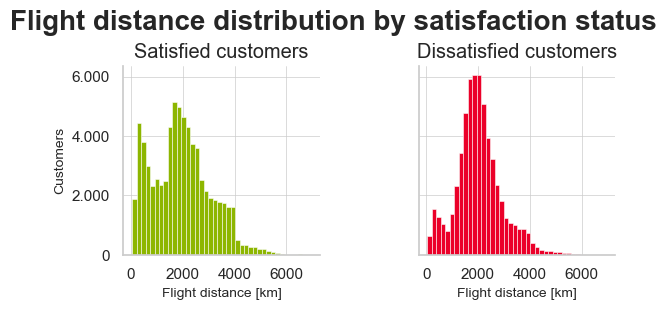

In [482]:
# Me traigo la distancia media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Distancias [km]'+Style.RESET_ALL)
dist_satisf_mean = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].mean().astype(int)
dist_satisf_max = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].max().astype(int)
dist_satisf_min = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].min().astype(int)
dist_satisf_median = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].median().astype(int)
dist_satisf_desv = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].std().astype(int)
dist_satisf_mode = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].apply(lambda x: x.mode().iat[0].astype(int))

tabla_dist = pd.DataFrame({
    'Satisfacción': dist_satisf_mean.index,
    'Min': dist_satisf_min.values,
    'Median': dist_satisf_median.values,
    'Max': dist_satisf_max.values,
    'Mean': dist_satisf_mean.values,
    'Mode': dist_satisf_mode.values,
    'DesvStd': dist_satisf_desv.values
})

tabla_formateada_dist = tabulate(tabla_dist, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_dist)
print()

dist_dif = np.diff(dist_satisf_mean)[0]
print('Hay una diferencia de',abs(dist_dif.astype(int)),'km entre los estados de satisfacción')
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='satisfaction', y='Flight Distance', data=df, palette=['#8DB600','#eb0029'], linewidth=0.4)

# Añadir etiquetas para la media, mediana y rangos
for i, satisfaction_level in enumerate(df['satisfaction'].unique()):
    data = df[df['satisfaction'] == satisfaction_level]['Flight Distance']
    mean = data.mean()
    median = data.median()
    lower, upper = data.quantile([0.25, 0.75])
    
    # Etiqueta para la media
    ax.annotate(f'Mean {format_thousands(mean,0)}', xy=(i, mean), xytext=(i, mean+100),
                ha='center', va='bottom',fontsize=9)
    
    # Etiqueta para la mediana
    ax.annotate(f'Median {format_thousands(median,0)}', xy=(i, median), xytext=(i, median-100),
                ha='center', va='top',fontsize=9)
    
    # Etiquetas para los rangos intercuartílicos (IQR)
    ax.annotate(f'IQR Upper {format_thousands(upper,0)}', xy=(i, upper), xytext=(i, upper+300),
                 ha='center', va='top',fontsize=9)
    ax.annotate(f'IQR Lower {format_thousands(lower,0)}', xy=(i, lower), xytext=(i, lower-300),
                 ha='center', va='bottom',fontsize=9)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
    
plt.title("Boxplot of Flight Distance by Satisfaction",fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance [km]')
plt.show()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  palette = paleta_colores,
                  )
ax.map(sns.histplot, "Flight Distance", bins = 40)

ax.set_titles(template="{col_name} customers", fontsize = 6)

ax.set_axis_labels("Flight distance [km]", "Customers", fontsize = 10)

plt.suptitle("Flight distance distribution by satisfaction status", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
plt.subplots_adjust(wspace=0.5)

ax = plt.gca()

###### 5.7. ¿Cómo se correlacionan los diferentes servicios a bordo, como la comodidad del asiento, la comida y bebida, el entretenimiento y el wifi con la satisfacción? ¿La calidad de los servicios en línea, como la facilidad de reserva y el soporte en línea tiene relación con la satisfacción?
En primer lugar cree 3 variables nuevas para caracterizar a los servicios: servicio a bordo - servicios brindados por la aerolínea -, servicios online - servicios también brindados por la aerolínea pero fuera de la experiencia del vuelo-, y servicios del aeropuerto. 
A grandes rasgos se podría decir que los servicios online y del aeropuerto afectan en gran medida a la satisfacción overall dado que a menores score en estas dos cracterísticas aumenta la cantidad de usuarios insatisfechos, en cambio con los servicios inflight no ocurre esto, no se ve una relación clara entre menor score de inflight, menor satisfacción overall.

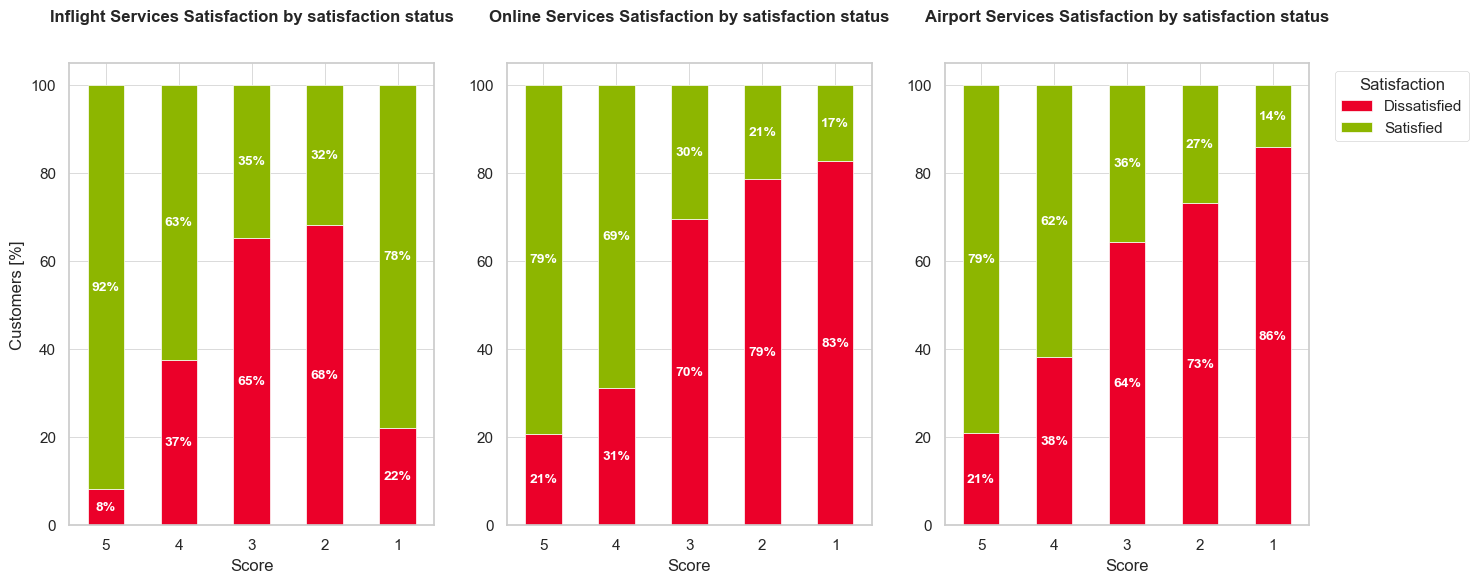

In [537]:
#Creo variables nuevas que generalicen los tipos de features
inflight_services = np.ceil(df[['Seat comfort','Food and drink','Inflight wifi service','Inflight entertainment','Leg room service','Cleanliness','Departure/Arrival time convenient']].mean(axis=1)).astype(int)
online_services = np.ceil(df[['Online support', 'Ease of Online booking','Online boarding']].mean(axis=1)).astype(int)
airport_services = np.ceil(df[['Gate location', 'On-board service','Baggage handling','Checkin service']].mean(axis=1)).astype(int)
df['Inflight services'] = inflight_services
df['Online services'] = online_services
df['Airport services'] = airport_services

#Entiendo las variables creadas en relación a la satisfacción. Creo variables para graficar
infight_nom = df.groupby(['Inflight services','satisfaction']).size().unstack(fill_value=0)
infight_pct = infight_nom.div(infight_nom.sum(axis=1), axis=0) * 100
infight_pct_sort = infight_pct.sort_values(by='Inflight services', ascending = False)

online_nom = df.groupby(['Online services','satisfaction']).size().unstack(fill_value=0)
online_pct = online_nom.div(online_nom.sum(axis=1), axis=0) * 100
online_pct_sort = online_pct.sort_values(by='Online services', ascending = False)

airport_nom = df.groupby(['Airport services','satisfaction']).size().unstack(fill_value=0)
airport_pct = airport_nom.div(airport_nom.sum(axis=1), axis=0) * 100
airport_pct_sort = airport_pct.sort_values(by='Airport services', ascending = False)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Grafico Inflight Services
ax1 = infight_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[0])
ax1.set_title('Inflight Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax1.set_xlabel('Score', fontsize=12)
ax1.set_ylabel('Customers [%]', fontsize=12)
ax1.legend().set_visible(False)  
ax1.tick_params(axis='x', rotation=0)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Online Services
ax2 = online_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[1])
ax2.set_title('Online Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax2.set_xlabel('Score', fontsize=12)
ax2.legend().set_visible(False)  
ax2.tick_params(axis='x', rotation=0)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Airport Services
ax3 = airport_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[2])
ax3.set_title('Airport Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax3.set_xlabel('Score', fontsize=12)
ax3.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


###### 5.8. ¿Cuáles son los servicios que más pesan en la satisfacción? ¿La puntualidad en la salida y llegada del vuelo afecta la satisfacción de los pasajeros?
Partiendo de las características anteriores donde se entendió a priori cómo podrían estar afectando los servicios, se realizó un deep dive en la ponderación de cada uno de los servicios dentro de la satisfacción, donde se puede ver qué más del 50% de la ponderación la tienen los servicios online indicando que son los primeros que deberán ser atacados para mejorar la satisfacción overall de los clientes, en segundo lugar se encuentran los servicios infligt y por último los servicios correspondientes al aeropuerto. 
De acá se aperturó por todos los features disponibles en la encuesta realizada, donde el 25% de la importancia se encuentra en "inflight entertainment", seguido de la comodidad del asiento, esto puede relacionarse con la cantidad de usuarios en la clase "Eco" y luego la facilidad de sacar un vuelo online.

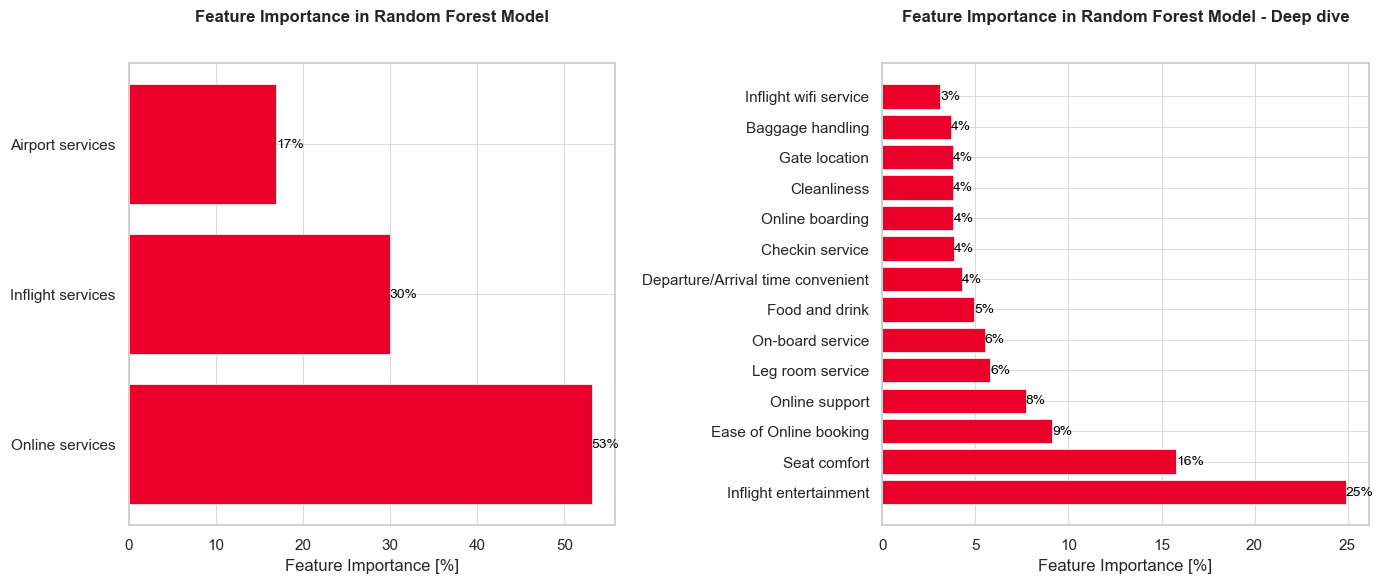

In [540]:
#Selecciono características y la objetivo
feature_names = ['Inflight services','Online services','Airport services']
X = df[feature_names]
y = df['satisf_binaria']

#Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creo un modelo de random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_names = X.columns

# Combino las características e importancias y las ordeno
feature_importance_tuples = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importances = zip(*feature_importance_tuples)

#Selecciono las características y la variable objetivo para deep dive
feature_names_1 = ['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support', 'Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']
X1 = df[feature_names_1]
y1 = df['satisf_binaria']

#Divido el conjunto de datos en entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Creo un modelo de random forest
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1_train, y1_train)

feature_importances_1 = model1.feature_importances_

feature_names_1 = X1.columns

# Combino las características e importancias y las ordeno
feature_importance_tuples_1 = sorted(zip(feature_names_1, feature_importances_1), key=lambda x: x[1], reverse=True)
sorted_feature_names_1, sorted_feature_importances_1 = zip(*feature_importance_tuples_1)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0].barh(range(len(sorted_feature_importances)), np.array(sorted_feature_importances) * 100,
                   align='center', color='#EB0029')
axes[0].set_yticks(range(len(sorted_feature_importances)), sorted_feature_names)
axes[0].set_xlabel('Feature Importance [%]', fontsize=12)
axes[0].set_title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax1.patches, sorted_feature_importances):
    color = 'black'
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)

ax2 = axes[1].barh(range(len(sorted_feature_importances_1)), np.array(sorted_feature_importances_1) * 100,
                   align='center', color='#EB0029')
axes[1].set_yticks(range(len(sorted_feature_importances_1)), sorted_feature_names_1)
axes[1].set_xlabel('Feature Importance [%]', fontsize=12)
axes[1].set_title('Feature Importance in Random Forest Model - Deep dive', fontsize=12, fontweight='bold', pad=30)

for bar, importance in zip(ax2.patches, sorted_feature_importances_1):
    color = 'black'
    axes[1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance * 100:.0f}%',
                va='center', ha='left', fontsize=10, color=color)
    
plt.subplots_adjust(wspace=0.55)
plt.show()

###### 5.9. ¿Cuál es la distribución de la duración de los retrasos en la salida y/o la llegada y cómo afecta esto a la satisfacción?
La duración de los retrasos tiene una dispersión elevada en cada uno de los estados de satisfacción. Por esto es que armar clusters de tiempos de retrasos para entender el comportamiento de cada cluster versus la satisfacción ayudará a entender en qué punto está el quiebre donde los usuarios pasan a estar insatisfechos. 

In [572]:
# Filtra los valores diferentes de 0
df_filtered = df[df['Departure Delay in Minutes'] != 0]

# Calcula las estadísticas
departure_mean = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1 = df_filtered['Departure Delay in Minutes'].quantile(0.25)
Q3 = df_filtered['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df_filtered[~((df_filtered['Departure Delay in Minutes'] < (Q1 - 1.5 * IQR)) | (df_filtered['Departure Delay in Minutes'] > (Q3 + 1.5 * IQR)))]

# Calcula las estadísticas
departure_mean = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()


# Filtra los valores diferentes de 0
df_filtered_1 = df[df['Arrival Delay in Minutes'] != 0]

# Calcula las estadísticas
arrival_mean = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.25)
Q3_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

filtered_data_1 = df_filtered_1[~((df_filtered_1['Arrival Delay in Minutes'] < (Q1_1 - 1.5 * IQR_1)) | (df_filtered_1['Arrival Delay in Minutes'] > (Q3_1 + 1.5 * IQR_1)))]

# Calcula las estadísticas
arrival_mean = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()


Departure delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       19 |  1592 |     38 |      1 |        57 |
| Satisfied      |     1 |       14 |  1305 |     29 |      1 |        45 |

Hay una diferencia de 9 min entre los estados de satisfacción

Departure delay sin outliers [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       15 |    91 |     22 |      1 |        21 |
| Satisfied      |     1 |       12 |    91 |     20 |      1 |        20 |

Hay una diferencia de 2 min entre los estados de satisfacción

Arrival delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     